A nice API and tutorial: https://dev.socrata.com/foundry/data.cityofchicago.org/ijzp-q8t2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import kuaizi
kuaizi.set_matplotlib(style='nature', usetex=False)

In [6]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv') # Slow!!!!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370519 entries, 0 to 7370518
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

### Whole Chicago since 2014

In [37]:
dff = df.loc[df['Year'] > 2013]

In [38]:
dff['Date'] = pd.to_datetime(dff['Date'])

In [39]:
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [40]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

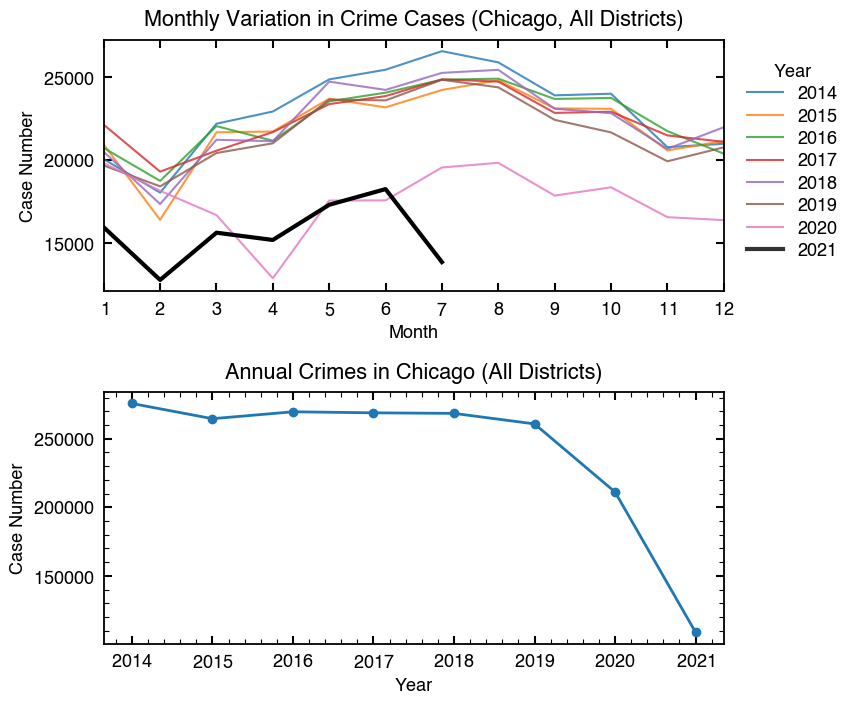

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in Crime Cases (Chicago, All Districts)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Crimes in Chicago (All Districts)')


plt.subplots_adjust(hspace=0.4)

plt.savefig('Chicago-all-districts.png')

### Look at Distrct 2

In [42]:
dff = df.loc[(df['Year'] > 2013) & (df['District'] == 2)]

In [43]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [44]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

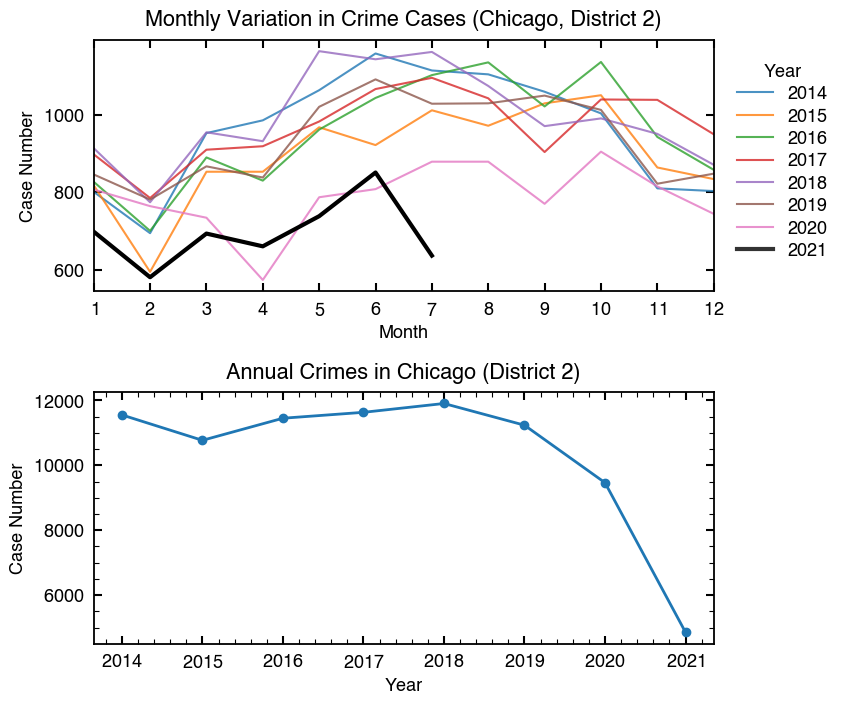

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in Crime Cases (Chicago, District 2)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Crimes in Chicago (District 2)')


plt.subplots_adjust(hspace=0.4)

plt.savefig('Chicago-district-2.png')

### Look at Distrct 2, Beat 0235

In [46]:
dff = df.loc[(df['Year'] > 2013) & (df['Beat'] == 235)]

In [47]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

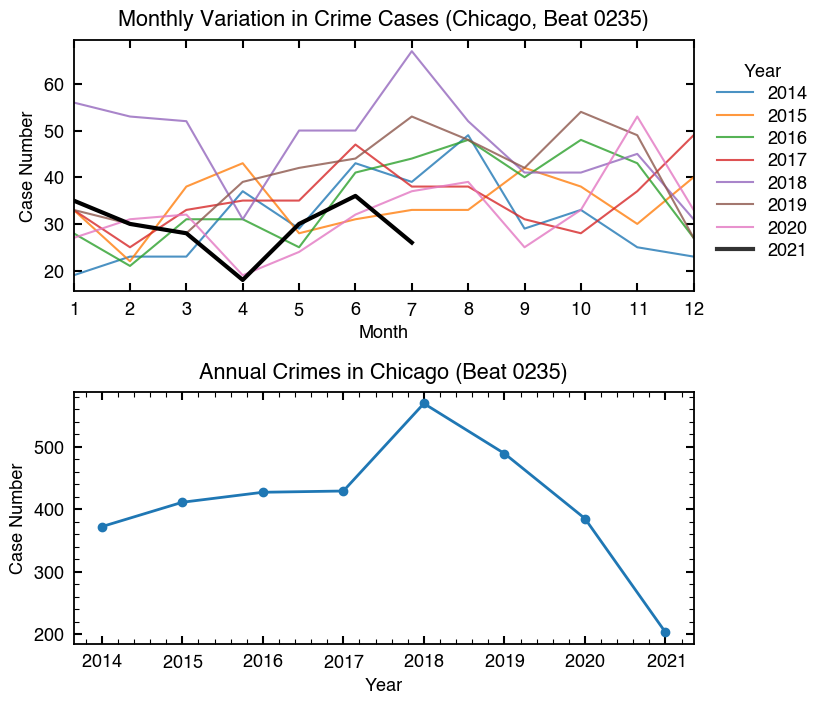

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in Crime Cases (Chicago, Beat 0235)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Crimes in Chicago (Beat 0235)')


plt.subplots_adjust(hspace=0.4)

plt.savefig('Chicago-beat-0235.png')

### Look at Distrct 2, violent crimes

In [126]:
np.unique(dff['Primary Type'])

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [49]:
violent_crime = ['HOMICIDE', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 
                 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ROBBERY']

In [50]:
dff = df.loc[(df['Year'] > 2013) & (df['District'] == 2) & (~df['Domestic'])] # 不算家庭暴力

violence_mask = np.logical_or.reduce([dff['Primary Type'] == item for item in violent_crime])
dff = dff.loc[violence_mask]

In [52]:
len(dff)

9601

In [53]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [54]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

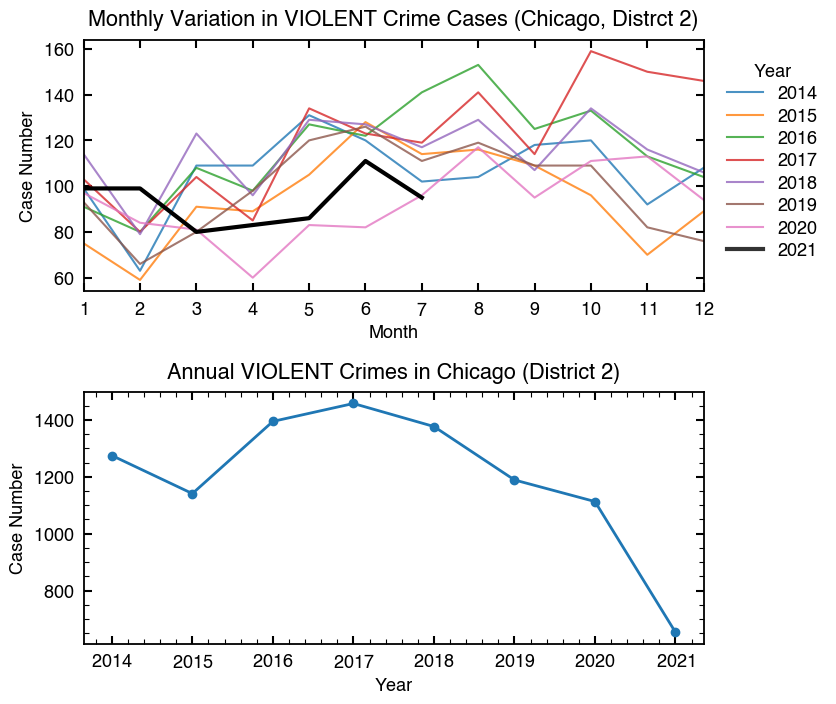

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in VIOLENT Crime Cases (Chicago, Distrct 2)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual VIOLENT Crimes in Chicago (District 2)')


plt.subplots_adjust(hspace=0.4)

# plt.savefig('Chicago-district-2-violent.png')

### Look at Beat 0235, violent crimes

In [60]:
np.unique(dff['Primary Type'])

array(['ASSAULT', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE', 'KIDNAPPING', 'ROBBERY'], dtype=object)

In [61]:
violent_crime = ['HOMICIDE', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 
                 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ROBBERY']

In [62]:
dff = df.loc[(df['Year'] > 2013) & (df['Beat'] == 235) & (~df['Domestic'])] # 不算家庭暴力

violence_mask = np.logical_or.reduce([dff['Primary Type'] == item for item in violent_crime])
dff = dff.loc[violence_mask]

In [63]:
len(dff)

331

In [64]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [65]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

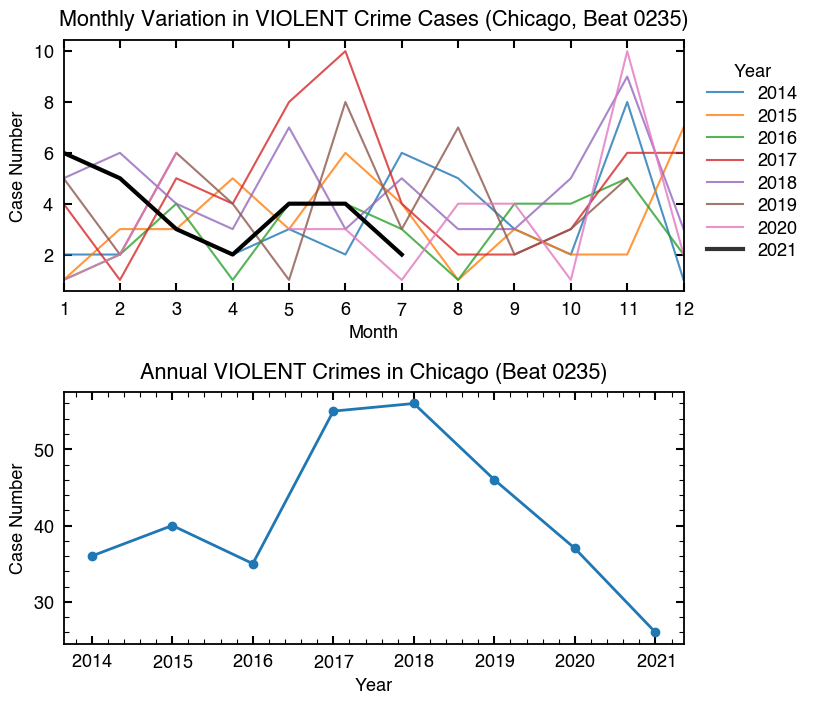

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in VIOLENT Crime Cases (Chicago, Beat 0235)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual VIOLENT Crimes in Chicago (Beat 0235)')


plt.subplots_adjust(hspace=0.4)

plt.savefig('Chicago-beat-0235-violent.png')

### Look at whole chicago, violent crimes

In [68]:
np.unique(dff['Primary Type'])

array(['ASSAULT', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE', 'KIDNAPPING', 'ROBBERY'], dtype=object)

In [69]:
violent_crime = ['HOMICIDE', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 
                 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ROBBERY']

In [73]:
dff = df.loc[(df['Year'] > 2013) & (~df['Domestic'])] # 不算家庭暴力

violence_mask = np.logical_or.reduce([dff['Primary Type'] == item for item in violent_crime])
dff = dff.loc[violence_mask]

In [74]:
len(dff)

190887

In [75]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [76]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

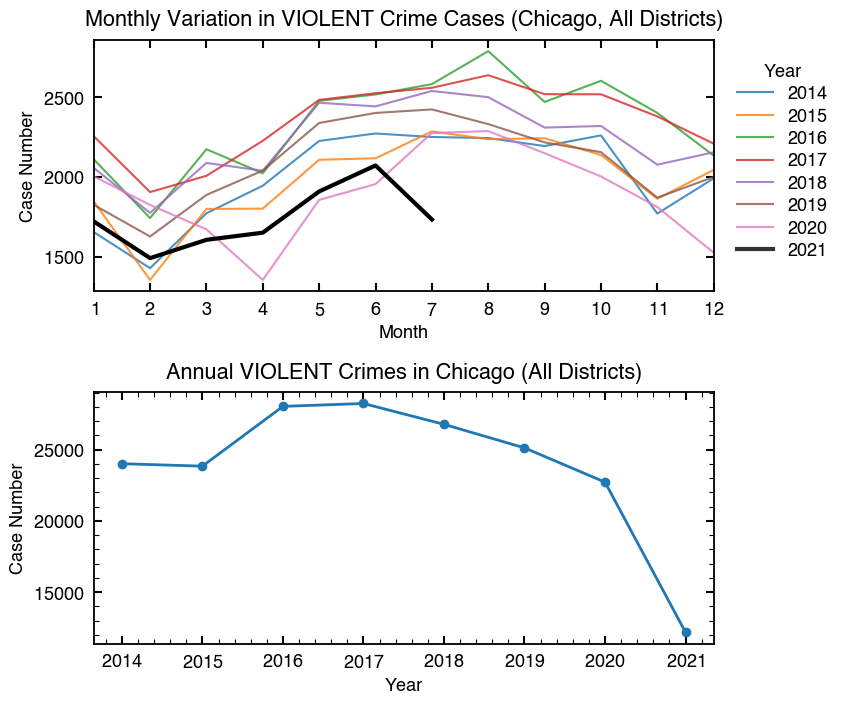

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

plt.sca(axes[0])
ax = axes[0]
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(np.arange(1, 13, 1), minor=False)
ax.set_xlim(1, 12)
ax.minorticks_off()

plt.title('Monthly Variation in VIOLENT Crime Cases (Chicago, All Districts)')


plt.sca(axes[1])
ax = axes[1]

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax, linewidth=2, marker='o')
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual VIOLENT Crimes in Chicago (All Districts)')


plt.subplots_adjust(hspace=0.4)
plt.savefig('Chicago-all-district-violent.png')

### Rank beats in District 2

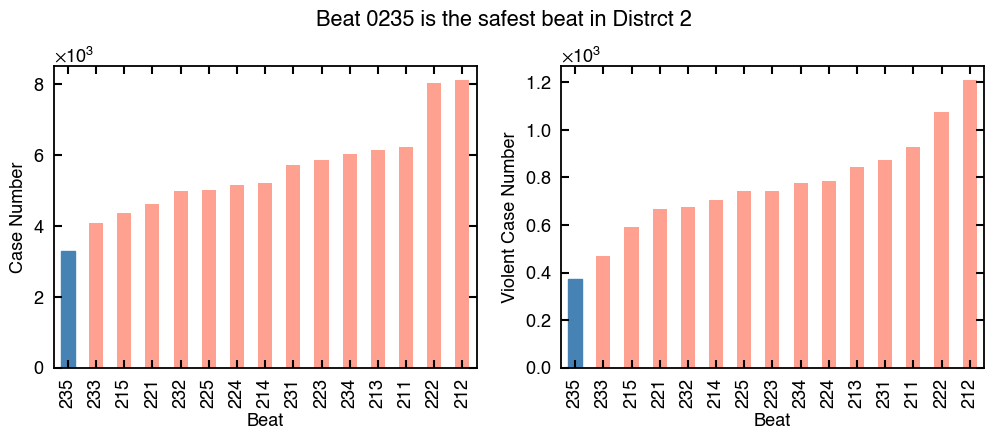

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# All crimes
dff = df.loc[(df['Year'] > 2013) & (df['District'] == 2)]
tab = dff.groupby('Beat')['Case Number'].count().to_frame()
tab = tab.loc[tab.index < 300]
tab = tab.sort_values('Case Number')

ax = axes[0]
plt.sca(ax)

tab.plot(kind='bar', ax=ax, legend=False, color='tomato', alpha=0.6)
ax.minorticks_off()

ln = ax.get_children()[0]
ln.set_color('steelblue')
ln.set_alpha(1)

plt.ylabel('Case Number')

# Violent crimes
violence_mask = np.logical_or.reduce([dff['Primary Type'] == item for item in violent_crime])
dff = dff.loc[violence_mask]
tab = dff.groupby('Beat')['Case Number'].count().to_frame()
tab = tab.loc[tab.index < 300]
tab = tab.sort_values('Case Number')

ax = axes[1]
plt.sca(ax)

tab.plot(kind='bar', ax=ax, legend=False, color='tomato', alpha=0.6)
ax.minorticks_off()

ln = ax.get_children()[0]
ln.set_color('steelblue')
ln.set_alpha(1)

plt.ylabel('Violent Case Number')


plt.subplots_adjust(wspace=0.2)
plt.suptitle('Beat 0235 is the safest beat in Distrct 2', y=1.02)

plt.savefig('beat-0235-safe.png')

In [148]:
df['Date']

0          09/05/2015 01:30:00 PM
1          09/04/2015 11:30:00 AM
2          09/01/2018 12:01:00 AM
3          09/05/2015 12:45:00 PM
4          09/05/2015 01:00:00 PM
                    ...          
7370514    07/24/2021 04:08:00 PM
7370515    07/24/2021 02:00:00 PM
7370516    07/15/2021 10:00:00 AM
7370517    07/24/2021 04:44:00 PM
7370518    07/24/2021 06:50:00 AM
Name: Date, Length: 7370519, dtype: object